<a href="https://colab.research.google.com/github/atharvaK718/Exploratory-Data-Analysis/blob/main/5.Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libarires and Dataset

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import minimum_spanning_tree

In [13]:
df = pd.read_csv("/content/catholic.csv")

# Selecting the appropriate columns for clustering

In [14]:
X = df[['read12', 'math12']].values

# Spectral Clustering

In [15]:
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
df['spectral_cluster'] = sc.fit_predict(X)

## Visualize Spectral Clustering Results

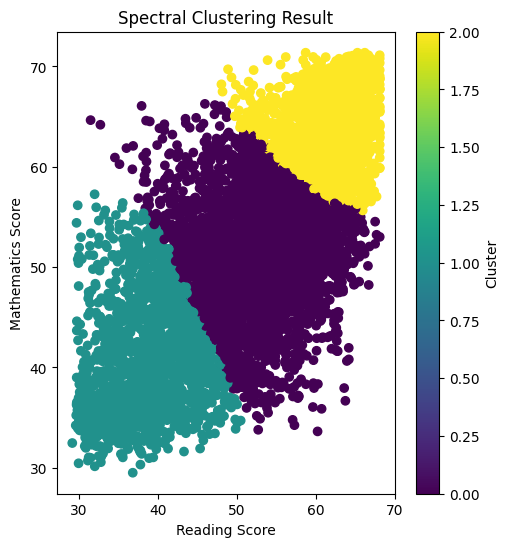

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['read12'], df['math12'], c=df['spectral_cluster'], cmap='viridis', marker='o')
plt.title("Spectral Clustering Result")
plt.xlabel('Reading Score')
plt.ylabel('Mathematics Score')
plt.colorbar(label='Cluster')

# Agglomerative Clustering

In [17]:
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(X)

## Visualize Agglomerative Clustering Results

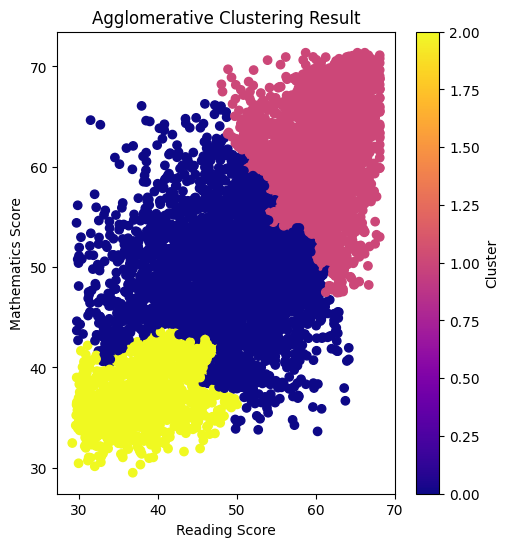

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(df['read12'], df['math12'], c=df['agglo_cluster'], cmap='plasma', marker='o')
plt.title("Agglomerative Clustering Result")
plt.xlabel('Reading Score')
plt.ylabel('Mathematics Score')
plt.colorbar(label='Cluster')


# Minimum Spanning Tree

In [21]:
distance_matrix = pairwise_distances(X)
mst_matrix = minimum_spanning_tree(distance_matrix).toarray()

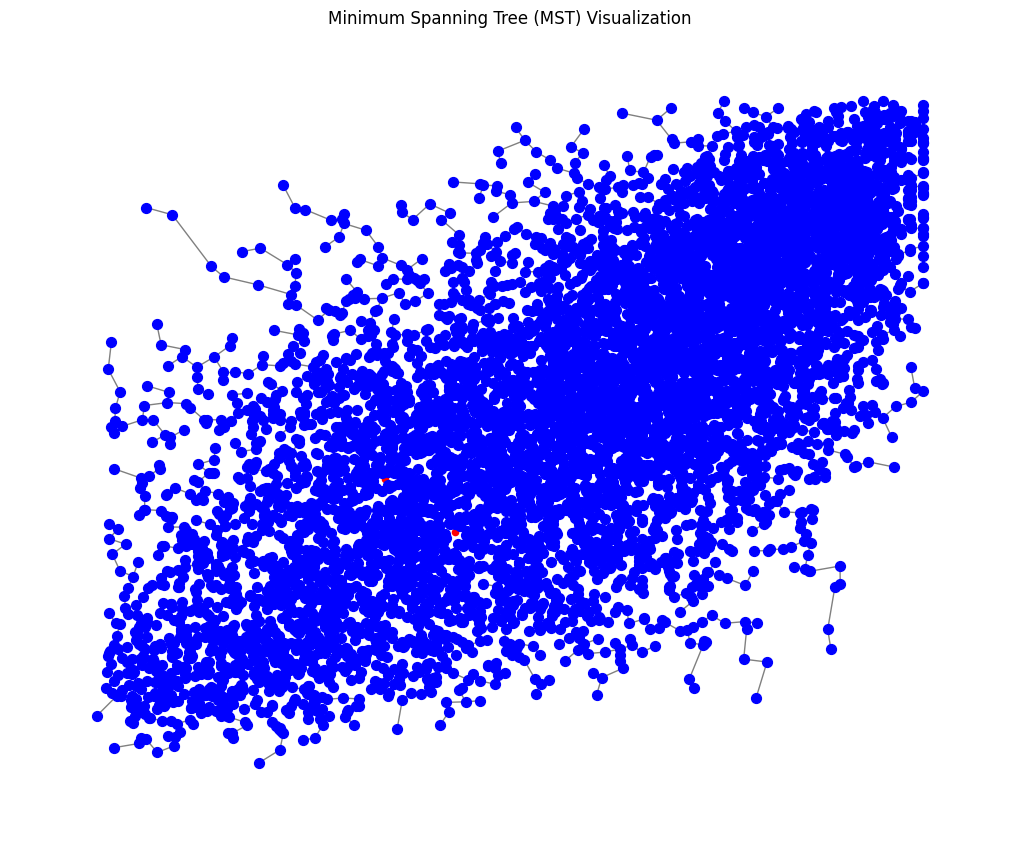

In [22]:
# Create a NetworkX graph from the MST matrix
G = nx.Graph()
for i in range(len(mst_matrix)):
    for j in range(i + 1, len(mst_matrix)):  # Only upper triangle needed
        if mst_matrix[i, j] > 0:
            G.add_edge(i, j, weight=mst_matrix[i, j])

# Plot MST with node points
plt.figure(figsize=(10, 8))
pos = {i: (X[i, 0], X[i, 1]) for i in range(len(X))}  # Map nodes to data points
nx.draw(G, pos, node_size=50, node_color="blue", edge_color="gray", with_labels=False)
plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', s=20)  # Original data points
plt.title("Minimum Spanning Tree (MST) Visualization")
plt.xlabel("Reading Score")
plt.ylabel("Mathematics Score")
plt.show()